In [1]:
import pandas as pd
from bs4 import BeautifulSoup
import requests

noms = []
descriptions = []
prix = []
ratings = []

for element in range(1, 21):
    url = requests.get(f"https://www.webscraper.io/test-sites/e-commerce/static/computers/laptops?page={element}").text
    _soup = BeautifulSoup(url, 'lxml')

    _parent = _soup.find_all("div", attrs={"class": "caption"})
    _row = _soup.find_all("div", attrs={"class": "ratings"})
    for nom in _parent:
        noms.append( nom.find("a", attrs={"class": 'title'}).text )

    for description in _parent:
        descriptions.append( description.find("p", attrs={"class": 'description'}).text )

    for _prix in _parent:
        prix.append( _prix.find("h4", attrs={"class": 'pull-right price'}).text )
    
    for _ratings in _row:
        ratings.append( len(_ratings.find_all('span', attrs={'class':'glyphicon glyphicon-star'}))  )

data = {
    "Noms" : noms,
    "Description" : descriptions,
    "Prix" : prix,
    "Ratings" : ratings
}

In [2]:
df = pd.DataFrame(data)
df

,Noms,Description,Prix,Ratings
0,Packard 255 G2,"15.6"", AMD E2-3800 1.3GHz, 4GB, 500GB, Windows...",$416.99,2
1,Aspire E1-510,"15.6"", Pentium N3520 2.16GHz, 4GB, 500GB, Linux",$306.99,3
2,ThinkPad T540p,"15.6"", Core i5-4200M, 4GB, 500GB, Win7 Pro 64bit",$1178.99,1
3,ProBook,"14"", Core i5 2.6GHz, 4GB, 500GB, Win7 Pro 64bit",$739.99,4
4,ThinkPad X240,"12.5"", Core i5-4300U, 8GB, 240GB SSD, Win7 Pro...",$1311.99,3
...,...,...,...,...
112,Lenovo ThinkPad...,"Lenovo ThinkPad T470, 14"" FHD IPS, Core i5-720...",$1349.23,1
113,Lenovo ThinkPad...,"Lenovo ThinkPad Yoga 370 Black, 13.3"" FHD IPS ...",$1362.24,2
114,Toshiba Portege...,"Toshiba Portege X20W-D-10V Black/Blue, 12.5"" F...",$1366.32,1
115,Asus ASUSPRO B94...,"Asus ASUSPRO B9440UA-GV0279R Gray, 14"" FHD, Co...",$1381.13,1


In [3]:
df['Prix'] = df['Prix'].str.replace('$','').astype('float')
df

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_5440\3451851977.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df['Prix'] = df['Prix'].str.replace('$','').astype('float')


,Noms,Description,Prix,Ratings
0,Packard 255 G2,"15.6"", AMD E2-3800 1.3GHz, 4GB, 500GB, Windows...",416.99,2
1,Aspire E1-510,"15.6"", Pentium N3520 2.16GHz, 4GB, 500GB, Linux",306.99,3
2,ThinkPad T540p,"15.6"", Core i5-4200M, 4GB, 500GB, Win7 Pro 64bit",1178.99,1
3,ProBook,"14"", Core i5 2.6GHz, 4GB, 500GB, Win7 Pro 64bit",739.99,4
4,ThinkPad X240,"12.5"", Core i5-4300U, 8GB, 240GB SSD, Win7 Pro...",1311.99,3
...,...,...,...,...
112,Lenovo ThinkPad...,"Lenovo ThinkPad T470, 14"" FHD IPS, Core i5-720...",1349.23,1
113,Lenovo ThinkPad...,"Lenovo ThinkPad Yoga 370 Black, 13.3"" FHD IPS ...",1362.24,2
114,Toshiba Portege...,"Toshiba Portege X20W-D-10V Black/Blue, 12.5"" F...",1366.32,1
115,Asus ASUSPRO B94...,"Asus ASUSPRO B9440UA-GV0279R Gray, 14"" FHD, Co...",1381.13,1


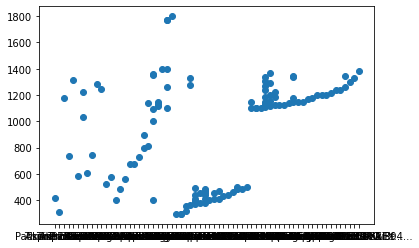

In [15]:
import matplotlib.pyplot as plt
plt.scatter(df.Noms, df.Prix)
plt.show()

In [5]:
print('Highest Rate')
__highest_rate = df.nlargest(3, 'Ratings')
print(__highest_rate)

print("*" * 50)
print("Lowest Rate")
__lowest_rate = df.nsmallest(3, 'Ratings')
print(__lowest_rate)

Highest Rate
                   Noms                                        Description  \
3               ProBook    14", Core i5 2.6GHz, 4GB, 500GB, Win7 Pro 64bit   
15       Dell Vostro 15  Dell Vostro 15 (3568) Black, 15.6" FHD, Core i...   
26  Asus ROG Strix G...  Asus ROG Strix GL702ZC-GC154T, 17.3" FHD, Ryze...   

       Prix  Ratings  
3    739.99        4  
15   488.78        4  
26  1769.00        4  
**************************************************
Lowest Rate
             Noms                                        Description     Prix  \
2  ThinkPad T540p   15.6", Core i5-4200M, 4GB, 500GB, Win7 Pro 64bit  1178.99   
5  Aspire E1-572G  15.6", Core i5-4200U, 8GB, 1TB, Radeon R7 M265...   581.99   
7        Pavilion      15.6", Core i5-4200U, 6GB, 750GB, Windows 8.1   609.99   

   Ratings  
2        1  
5        1  
7        1  


In [6]:
print('Highest Price')
__highest_price = df.nlargest(3, 'Prix')
print(__highest_price)

print("*" * 50)
print("Lowest Price")
__lowest_price = df.nsmallest(3, 'Prix')
print(__lowest_price)

Highest Price
                   Noms                                        Description  \
28  Asus ROG Strix S...  Asus ROG Strix SCAR Edition GL503VM-ED115T, 15...   
26  Asus ROG Strix G...  Asus ROG Strix GL702ZC-GC154T, 17.3" FHD, Ryze...   
27  Asus ROG Strix G...  Asus ROG Strix GL702ZC-GC209T, 17.3" FHD IPS, ...   

      Prix  Ratings  
28  1799.0        3  
26  1769.0        4  
27  1769.0        1  
**************************************************
Lowest Price
                   Noms                                        Description  \
29  Asus VivoBook X4...  Asus VivoBook X441NA-GA190 Chocolate Black, 14...   
30  Prestigio SmartB...  Prestigio SmartBook 133S Dark Grey, 13.3" FHD ...   
31  Prestigio SmartB...  Prestigio SmartBook 133S Gold, 13.3" FHD IPS, ...   

      Prix  Ratings  
29  295.99        3  
30  299.00        2  
31  299.00        4  


# Tablets

In [7]:
_noms_tablets = []
_descriptions_tablets = []
__prix_tablets = []
__ratings_tablets = []

for element in range(1, 5):
    url = requests.get(f"https://www.webscraper.io/test-sites/e-commerce/static/computers/tablets?page={element}").text
    _soup = BeautifulSoup(url, 'lxml')

    _parent = _soup.find_all("div", attrs={"class": "caption"})
    _row = _soup.find_all("div", attrs={"class": "ratings"})
    for nom in _parent:
        _noms_tablets.append( nom.find("a", attrs={"class": 'title'}).text )

    for description in _parent:
        _descriptions_tablets.append( description.find("p", attrs={"class": 'description'}).text )

    for _prix in _parent:
        __prix_tablets.append( _prix.find("h4", attrs={"class": 'pull-right price'}).text )
    
    for _ratings in _row:
        __ratings_tablets.append( len(_ratings.find_all('span', attrs={'class':'glyphicon glyphicon-star'}))  )

data_tablets = {
    "Noms" : _noms_tablets,
    "Description" : _descriptions_tablets,
    "Prix" : __prix_tablets,
    "Ratings" : __ratings_tablets
}

df_tablets = pd.DataFrame(data_tablets)
df_tablets['Prix'] = df_tablets['Prix'].str.replace('$','').astype('float')
df_tablets

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_5440\1007713377.py:32: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df_tablets['Prix'] = df_tablets['Prix'].str.replace('$','').astype('float')


,Noms,Description,Prix,Ratings
0,Lenovo IdeaTab,"7"" screen, Android",69.99,3
1,Acer Iconia,"7"" screen, Android, 16GB",96.99,1
2,Asus MeMO Pad,"7"" screen, Android, 8GB",102.99,4
3,Amazon Kindle,"6"" screen, wifi",103.99,4
4,iPad Mini Retina,"Wi-Fi + Cellular, 32GB, Silver",537.99,2
5,IdeaTab A3500L,"Black, 7"" IPS, Quad-Core 1.2GHz, 8GB, Android 4.2",88.99,4
6,Galaxy Tab,"16GB, White",251.99,3
7,IdeaTab A3500-H,"Blue, 7"" IPS, Quad-Core 1.3GHz, 8GB, 3G, Andro...",148.99,2
8,Galaxy Tab 3,"7"", 8GB, Wi-Fi, Android 4.2, White",97.99,2
9,Galaxy Note,"12.2"", 32GB, WiFi, Android 4.4, White",489.99,3


In [8]:
print("Highest Tablet Rates")
__highest_tablets_rate = df_tablets.nlargest(3, 'Ratings')
print(__highest_tablets_rate)

print('*' * 70)
print("Lowest Tablet Rates")
__lowest_tablets_rate = df_tablets.nsmallest(3, 'Ratings')
print(__lowest_tablets_rate)

Highest Tablet Rates
             Noms                                        Description    Prix  \
2   Asus MeMO Pad                            7" screen, Android, 8GB  102.99   
3   Amazon Kindle                                    6" screen, wifi  103.99   
5  IdeaTab A3500L  Black, 7" IPS, Quad-Core 1.2GHz, 8GB, Android 4.2   88.99   

   Ratings  
2        4  
3        4  
5        4  
**********************************************************************
Lowest Tablet Rates
                Noms                               Description    Prix  \
1        Acer Iconia                  7" screen, Android, 16GB   96.99   
10        MeMO Pad 7  White, 7", Atom 1.2GHz, 8GB, Android 4.4  130.99   
4   iPad Mini Retina            Wi-Fi + Cellular, 32GB, Silver  537.99   

    Ratings  
1         1  
10        1  
4         2  


In [9]:
print("Highest Tablets Price")
__highest_tablets_price = df_tablets.nlargest(3, 'Prix')
print(__highest_tablets_price)

print("*" * 70)
print("Lowest Tablets Price")
__lowest_tablets_price = df_tablets.nsmallest(3, 'Prix')
print(__lowest_tablets_price)

Highest Tablets Price
                Noms                     Description    Prix  Ratings
20    Apple iPad Air             Wi-Fi, 64GB, Silver  603.99        3
14  Galaxy Note 10.1              10.1", 32GB, Black  587.99        2
4   iPad Mini Retina  Wi-Fi + Cellular, 32GB, Silver  537.99        2
**********************************************************************
Lowest Tablets Price
             Noms                                        Description   Prix  \
0  Lenovo IdeaTab                                 7" screen, Android  69.99   
5  IdeaTab A3500L  Black, 7" IPS, Quad-Core 1.2GHz, 8GB, Android 4.2  88.99   
1     Acer Iconia                           7" screen, Android, 16GB  96.99   

   Ratings  
0        3  
5        4  
1        1  
